In [112]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import nltk 
import string
import re
from wordcloud import WordCloud
nltk.download()



showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [113]:
tweet_data=pd.read_csv(tweets1.csv)
tweet_data

,Unnamed: 0,user_name,user_location,user_description,user_verified,date,text,hashtags,source
0,0,i Logistics USA,"Miami, FL","🇺🇸Since 2018 “You Sell, We pick it, We pack it...",False,2022-10-10 02:49:08+00:00,https://t.co/FiklQTNntf \nWhatsApp us +1 (786)...,"['fulfillment', 'fulfillmentcenter', 'miami', ...",Twitter for iPhone
1,1,i Logistics USA,"Miami, FL","🇺🇸Since 2018 “You Sell, We pick it, We pack it...",False,2022-10-10 02:49:06+00:00,https://t.co/FiklQTNntf \nWhatsApp us +1 (786)...,"['fulfillment', 'fulfillmentcenter', 'miami', ...",Twitter for iPhone
2,2,i Logistics USA,"Miami, FL","🇺🇸Since 2018 “You Sell, We pick it, We pack it...",False,2022-10-10 02:48:34+00:00,https://t.co/FiklQTNntf \nWhatsApp us +1 (786)...,"['fulfillment', 'fulfillmentcenter', 'miami', ...",Twitter for iPhone
3,3,Add to Cart,United Kingdom,Add to Cart is one of the UK’s fastest-growing...,False,2022-10-10 02:47:33+00:00,vidaXL Bathroom Furniture Set White and Sonoma...,NaN,AddtoCart.co.uk
4,4,i Logistics USA,"Miami, FL","🇺🇸Since 2018 “You Sell, We pick it, We pack it...",False,2022-10-10 02:47:05+00:00,https://t.co/FiklQTNntf \nWhatsApp us +1 (786)...,"['fulfillment', 'fulfillmentcenter', 'miami', ...",Twitter for iPhone
...,...,...,...,...,...,...,...,...,...
96,96,Stylelib Themes & Templates,NaN,"50,000 WordPress Themes & Website Templates Fr...",False,2022-10-09 23:03:40+00:00,ChocoMars - Multi-Purpose WordPress Theme\nhtt...,"['bakery', 'chocolatewordpresstheme', 'chocoma...",stylelib.org
97,97,Fancy Names,NaN,NaN,False,2022-10-09 23:01:21+00:00,https://t.co/cP2vRs3Zbb is for Sale!\n#domain ...,"['domain', 'domainname', 'domainnameforsale', ...",IFTTT
98,98,Stylelib Themes & Templates,NaN,"50,000 WordPress Themes & Website Templates Fr...",False,2022-10-09 23:01:18+00:00,WooCommerce Membership *\nhttps://t.co/YTm90Hr...,"['codecanyon', 'ecommerce', 'membership', 'mem...",stylelib.org
99,99,Merchant Fraud Journal,United States,Merchant Fraud Journal is an independent and u...,False,2022-10-09 23:01:06+00:00,How to Create an Omnichannel Fraud Prevention ...,NaN,LaterMedia


In [114]:
tweet_data = tweet_data[[text]]
tweet_data = tweet_data.astype(str)

tweet_data

,text
0,https://t.co/FiklQTNntf \nWhatsApp us +1 (786)...
1,https://t.co/FiklQTNntf \nWhatsApp us +1 (786)...
2,https://t.co/FiklQTNntf \nWhatsApp us +1 (786)...
3,vidaXL Bathroom Furniture Set White and Sonoma...
4,https://t.co/FiklQTNntf \nWhatsApp us +1 (786)...
...,...
96,ChocoMars - Multi-Purpose WordPress Theme\nhtt...
97,https://t.co/cP2vRs3Zbb is for Sale!\n#domain ...
98,WooCommerce Membership *\nhttps://t.co/YTm90Hr...
99,How to Create an Omnichannel Fraud Prevention ...


In [115]:
string.punctuation


'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [116]:
# Remove https

def remove_url(text):
    url = re.compile(rhttps?://\S+|www\.\S+)
    return url.sub(r,text)

tweet_data[text] = tweet_data[text].apply(lambda x : remove_url(x))

tweet_data


,text
0,\nWhatsApp us +1 (786) 327-4369\n#fulfillment...
1,\nWhatsApp us +1 (786) 327-4369\n#fulfillment...
2,\nWhatsApp us +1 (786) 327-4369\n#fulfillment...
3,vidaXL Bathroom Furniture Set White and Sonoma...
4,\nWhatsApp us +1 (786) 327-4369\n#fulfillment...
...,...
96,ChocoMars - Multi-Purpose WordPress Theme\n\n\...
97,is for Sale!\n#domain #domainname #domainname...
98,WooCommerce Membership *\n\n\n#codecanyon #eco...
99,How to Create an Omnichannel Fraud Prevention ...


In [117]:
# Remove punctuation

tweet_data[clean_text] = tweet_data[text].str.replace([^\w\s],)
tweet_data.head()


/var/folders/q0/hps99sh511n627gdy32s4wlh0000gn/T/ipykernel_12733/1708073926.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  tweet_data['clean_text'] = tweet_data['text'].str.replace('[^\w\s]','')


,text,clean_text
0,\nWhatsApp us +1 (786) 327-4369\n#fulfillment...,\nWhatsApp us 1 786 3274369\nfulfillment fulf...
1,\nWhatsApp us +1 (786) 327-4369\n#fulfillment...,\nWhatsApp us 1 786 3274369\nfulfillment fulf...
2,\nWhatsApp us +1 (786) 327-4369\n#fulfillment...,\nWhatsApp us 1 786 3274369\nfulfillment fulf...
3,vidaXL Bathroom Furniture Set White and Sonoma...,vidaXL Bathroom Furniture Set White and Sonoma...
4,\nWhatsApp us +1 (786) 327-4369\n#fulfillment...,\nWhatsApp us 1 786 3274369\nfulfillment fulf...


In [118]:
def tokenization(text):
    text = re.split(\W+, text)
    return text

tweet_data[Tweet_tokenized] = tweet_data[clean_text].apply(lambda x: tokenization(x.lower()))
tweet_data.head()

,text,clean_text,Tweet_tokenized
0,\nWhatsApp us +1 (786) 327-4369\n#fulfillment...,\nWhatsApp us 1 786 3274369\nfulfillment fulf...,"[, whatsapp, us, 1, 786, 3274369, fulfillment,..."
1,\nWhatsApp us +1 (786) 327-4369\n#fulfillment...,\nWhatsApp us 1 786 3274369\nfulfillment fulf...,"[, whatsapp, us, 1, 786, 3274369, fulfillment,..."
2,\nWhatsApp us +1 (786) 327-4369\n#fulfillment...,\nWhatsApp us 1 786 3274369\nfulfillment fulf...,"[, whatsapp, us, 1, 786, 3274369, fulfillment,..."
3,vidaXL Bathroom Furniture Set White and Sonoma...,vidaXL Bathroom Furniture Set White and Sonoma...,"[vidaxl, bathroom, furniture, set, white, and,..."
4,\nWhatsApp us +1 (786) 327-4369\n#fulfillment...,\nWhatsApp us 1 786 3274369\nfulfillment fulf...,"[, whatsapp, us, 1, 786, 3274369, fulfillment,..."


In [119]:
nltk.download(stopwords)
stopwords = nltk.corpus.stopwords.words(english)
stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aanchaldusija/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [120]:
def remove_stopwords(text):
    text = [word for word in text if word not in stopwords]
    return text
    
tweet_data[Tweet_without_stop] = tweet_data[Tweet_tokenized].apply(lambda x: remove_stopwords(x))
tweet_data.head(5)

,text,clean_text,Tweet_tokenized,Tweet_without_stop
0,\nWhatsApp us +1 (786) 327-4369\n#fulfillment...,\nWhatsApp us 1 786 3274369\nfulfillment fulf...,"[, whatsapp, us, 1, 786, 3274369, fulfillment,...","[, whatsapp, us, 1, 786, 3274369, fulfillment,..."
1,\nWhatsApp us +1 (786) 327-4369\n#fulfillment...,\nWhatsApp us 1 786 3274369\nfulfillment fulf...,"[, whatsapp, us, 1, 786, 3274369, fulfillment,...","[, whatsapp, us, 1, 786, 3274369, fulfillment,..."
2,\nWhatsApp us +1 (786) 327-4369\n#fulfillment...,\nWhatsApp us 1 786 3274369\nfulfillment fulf...,"[, whatsapp, us, 1, 786, 3274369, fulfillment,...","[, whatsapp, us, 1, 786, 3274369, fulfillment,..."
3,vidaXL Bathroom Furniture Set White and Sonoma...,vidaXL Bathroom Furniture Set White and Sonoma...,"[vidaxl, bathroom, furniture, set, white, and,...","[vidaxl, bathroom, furniture, set, white, sono..."
4,\nWhatsApp us +1 (786) 327-4369\n#fulfillment...,\nWhatsApp us 1 786 3274369\nfulfillment fulf...,"[, whatsapp, us, 1, 786, 3274369, fulfillment,...","[, whatsapp, us, 1, 786, 3274369, fulfillment,..."


In [121]:
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

tweet_data[Tweet_stemmed] = tweet_data[Tweet_without_stop].apply(lambda x: stemming(x))
tweet_data.head()

,text,clean_text,Tweet_tokenized,Tweet_without_stop,Tweet_stemmed
0,\nWhatsApp us +1 (786) 327-4369\n#fulfillment...,\nWhatsApp us 1 786 3274369\nfulfillment fulf...,"[, whatsapp, us, 1, 786, 3274369, fulfillment,...","[, whatsapp, us, 1, 786, 3274369, fulfillment,...","[, whatsapp, us, 1, 786, 3274369, fulfil, fulf..."
1,\nWhatsApp us +1 (786) 327-4369\n#fulfillment...,\nWhatsApp us 1 786 3274369\nfulfillment fulf...,"[, whatsapp, us, 1, 786, 3274369, fulfillment,...","[, whatsapp, us, 1, 786, 3274369, fulfillment,...","[, whatsapp, us, 1, 786, 3274369, fulfil, fulf..."
2,\nWhatsApp us +1 (786) 327-4369\n#fulfillment...,\nWhatsApp us 1 786 3274369\nfulfillment fulf...,"[, whatsapp, us, 1, 786, 3274369, fulfillment,...","[, whatsapp, us, 1, 786, 3274369, fulfillment,...","[, whatsapp, us, 1, 786, 3274369, fulfil, fulf..."
3,vidaXL Bathroom Furniture Set White and Sonoma...,vidaXL Bathroom Furniture Set White and Sonoma...,"[vidaxl, bathroom, furniture, set, white, and,...","[vidaxl, bathroom, furniture, set, white, sono...","[vidaxl, bathroom, furnitur, set, white, sonom..."
4,\nWhatsApp us +1 (786) 327-4369\n#fulfillment...,\nWhatsApp us 1 786 3274369\nfulfillment fulf...,"[, whatsapp, us, 1, 786, 3274369, fulfillment,...","[, whatsapp, us, 1, 786, 3274369, fulfillment,...","[, whatsapp, us, 1, 786, 3274369, fulfil, fulf..."


In [122]:
nltk.download(wordnet)
wordnet = nltk.WordNetLemmatizer()

def lemmatizer(text):
    text = [wordnet.lemmatize(word) for word in text]
    return text

tweet_data[Tweet_lemmatized] = tweet_data[Tweet_without_stop].apply(lambda x: lemmatizer(x))
tweet_data.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/aanchaldusija/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,text,clean_text,Tweet_tokenized,Tweet_without_stop,Tweet_stemmed,Tweet_lemmatized
0,\nWhatsApp us +1 (786) 327-4369\n#fulfillment...,\nWhatsApp us 1 786 3274369\nfulfillment fulf...,"[, whatsapp, us, 1, 786, 3274369, fulfillment,...","[, whatsapp, us, 1, 786, 3274369, fulfillment,...","[, whatsapp, us, 1, 786, 3274369, fulfil, fulf...","[, whatsapp, u, 1, 786, 3274369, fulfillment, ..."
1,\nWhatsApp us +1 (786) 327-4369\n#fulfillment...,\nWhatsApp us 1 786 3274369\nfulfillment fulf...,"[, whatsapp, us, 1, 786, 3274369, fulfillment,...","[, whatsapp, us, 1, 786, 3274369, fulfillment,...","[, whatsapp, us, 1, 786, 3274369, fulfil, fulf...","[, whatsapp, u, 1, 786, 3274369, fulfillment, ..."
2,\nWhatsApp us +1 (786) 327-4369\n#fulfillment...,\nWhatsApp us 1 786 3274369\nfulfillment fulf...,"[, whatsapp, us, 1, 786, 3274369, fulfillment,...","[, whatsapp, us, 1, 786, 3274369, fulfillment,...","[, whatsapp, us, 1, 786, 3274369, fulfil, fulf...","[, whatsapp, u, 1, 786, 3274369, fulfillment, ..."
3,vidaXL Bathroom Furniture Set White and Sonoma...,vidaXL Bathroom Furniture Set White and Sonoma...,"[vidaxl, bathroom, furniture, set, white, and,...","[vidaxl, bathroom, furniture, set, white, sono...","[vidaxl, bathroom, furnitur, set, white, sonom...","[vidaxl, bathroom, furniture, set, white, sono..."
4,\nWhatsApp us +1 (786) 327-4369\n#fulfillment...,\nWhatsApp us 1 786 3274369\nfulfillment fulf...,"[, whatsapp, us, 1, 786, 3274369, fulfillment,...","[, whatsapp, us, 1, 786, 3274369, fulfillment,...","[, whatsapp, us, 1, 786, 3274369, fulfil, fulf...","[, whatsapp, u, 1, 786, 3274369, fulfillment, ..."


In [123]:
all_clean_words=[]

for i in tweet_data[Tweet_lemmatized]:
    for j in i:
        all_clean_words.append(j)

all_clean_words=list(set(all_clean_words)) #removes duplicate values from the list

clean_words_str= .join(all_clean_words)

In [124]:
from random import sample
clean_tweets=list(set(tweet_data[clean_text]))
sample=sample(clean_tweets,20)

In [125]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(sample)
vectorizer.get_feature_names()


/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['18779735537',
 '2022',
 '2535',
 '2m',
 '30ml',
 '36',
 '3d',
 '41x30x12',
 '50',
 '500',
 '620001',
 'account',
 'addtocart',
 'advertising',
 'after',
 'agency',
 'amazon',
 'amazonfba',
 'amazonprime',
 'amazonseller',
 'amp',
 'an',
 'and',
 'apparel',
 'architecture',
 'are',
 'art',
 'arteta',
 'back',
 'bandage',
 'basin',
 'basins',
 'bathroom',
 'bathroombasins',
 'beat',
 'beauty',
 'beverly',
 'black',
 'blast',
 'bought',
 'brand',
 'branding',
 'brands',
 'business',
 'button',
 'case',
 'ceramic',
 'chivas',
 'christmas',
 'class',
 'clicks',
 'clothing',
 'clothingaccessories',
 'cloting',
 'cm',
 'codecanyon',
 'cologne',
 'computer',
 'computeraccessories',
 'copyright',
 'cosmetics',
 'cucumber',
 'cutlery',
 'de',
 'decor',
 'decoration',
 'denim',
 'design',
 'designed',
 'developer',
 'digita',
 'digitaltwin',
 'dollar',
 'domain',
 'domainers',
 'domainforsale',
 'domainname',
 'domainnameforsale',
 'dominate',
 'dropshipping',
 'each',
 'eagle',
 'earl',
 'eau'

In [126]:
count_vect_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())
count_vect_df.head()


,18779735537,2022,2535,2m,30ml,36,3d,41x30x12,50,500,...,woocommercememberships,woocommercetemplate,wooyoung,wordpre,wordpress,wordpressdeveloper,wordpressmembership,wordpresswebsite,worldwide,you
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [127]:
from wordcloud import WordCloud
wordcloud = WordCloud(width = 800, height = 800,
                background_color =white,
                stopwords = stopwords,
                min_font_size = 10).generate(clean_words_str)

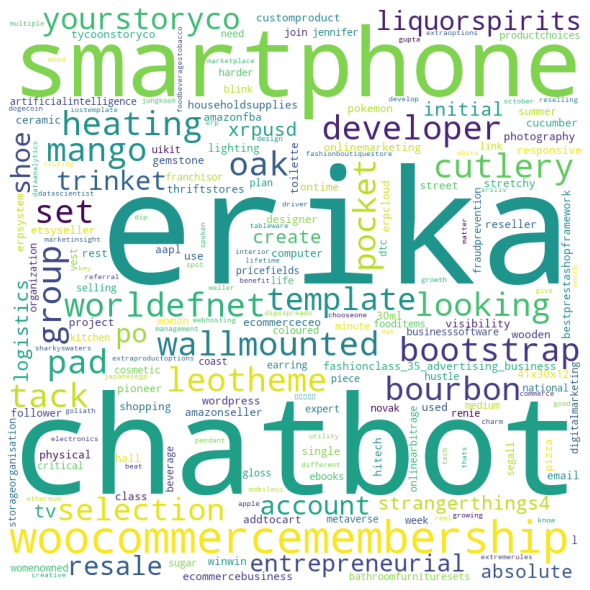

In [128]:
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [129]:
tweet_data.to_csv(Clean_Twitter_data1.csv)

: 